# **Here I am guided François Chollet's deep learning with python book to complete some of the foundational machine learning problems, continuing with multiclass classification using the REUTERS data set.**

# **loading the reuters dataset**

In [18]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [19]:
len(train_data)

8982

In [20]:
len(test_data)

2246

In [21]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

***decoding newswires back to text***

In [22]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [23]:
train_labels[10]

3

***encoding the data***

In [24]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

***model definition***

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

***compiling the model***

In [30]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

***setting aside a validation set***

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

***training the model***

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.7586 - accuracy: 0.4764 - val_loss: 1.8537 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.5557 - accuracy: 0.6771 - val_loss: 1.3684 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.1722 - accuracy: 0.7516 - val_loss: 1.1720 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.9540 - accuracy: 0.7965 - val_loss: 1.0873 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7893 - accuracy: 0.8314 - val_loss: 0.9942 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6525 - accuracy: 0.8614 - val_loss: 0.9655 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.5489 - accuracy: 0.8834 - val_loss: 0.9099 - val_accuracy: 0.7960
Epoch 8/20
16

***plot the training and validation loss***

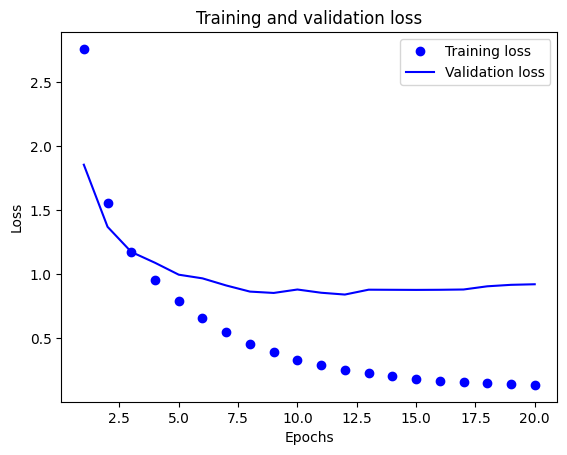

In [33]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

***plotting the training and validation accuracy***

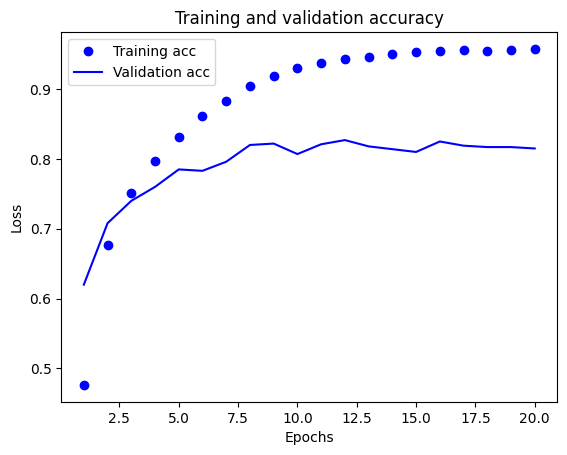

In [45]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

***retraining a model from scratch***

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 105ms/step - loss: 2.6522 - accuracy: 0.4484 - val_loss: 1.7726 - val_accuracy: 0.6200
Epoch 2/9
16/16 [==============================] - 2s 124ms/step - loss: 1.5184 - accuracy: 0.6740 - val_loss: 1.3787 - val_accuracy: 0.6870
Epoch 3/9
16/16 [==============================] - 2s 124ms/step - loss: 1.1843 - accuracy: 0.7364 - val_loss: 1.1921 - val_accuracy: 0.7270
Epoch 4/9
16/16 [==============================] - 2s 120ms/step - loss: 0.9800 - accuracy: 0.7856 - val_loss: 1.1101 - val_accuracy: 0.7420
Epoch 5/9
16/16 [==============================] - 1s 75ms/step - loss: 0.8200 - accuracy: 0.8186 - val_loss: 1.0051 - val_accuracy: 0.7810
Epoch 6/9
16/16 [==============================] - 1s 81ms/step - loss: 0.6858 - accuracy: 0.8545 - val_loss: 0.9450 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 1s 83ms/step - loss: 0.5739 - accuracy: 0.8770 - val_loss: 0.9319 - val_accuracy: 0.7930
Epoch 8/9
16/16 

In [47]:
results

[0.9450016021728516, 0.7818343639373779]

***generating predictions for new data***

In [48]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 8ms/step


In [49]:
predictions[0].shape

(46,)

In [50]:
np.sum(predictions[0])

0.99999994

In [51]:
np.argmax(predictions[0])

3